# TFIDF Featurization and ML models

## 1. Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
#import spacy

### 2.  Loading the data and splitting it  to 70:30

In [2]:
# avoid decoding problems
df = pd.read_csv("train.csv")

df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

X = df.drop(['is_duplicate'], axis=1)
Y = df[['is_duplicate']]

#Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)


In [3]:
print('X_train, Y_train', X_train.shape, Y_train.shape)
print('X_test, Y_test', X_test.shape, Y_test.shape)


X_train, Y_train (283003, 5) (283003, 1)
X_test, Y_test (121287, 5) (121287, 1)


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### 3. TFIDF Vectorization

In [5]:
# For Question 1 
# converting question1 to list
que1_train = list(X_train['question1']) 
que1_test = list(X_test['question1'])

tfidf_vect = TfidfVectorizer(ngram_range=(1,1),lowercase=False)
que1_train_tfidf = tfidf_vect.fit_transform(que1_train)
que1_test_tfidf = tfidf_vect.transform(que1_test)


In [6]:
print("the type of TFIDF vectorizer ",type(que1_train_tfidf ))
print("the type of TFIDF vectorizer ",type(que1_test_tfidf))

print(que1_train_tfidf.get_shape())
print(que1_test_tfidf.get_shape())

print("the number of unique words ", que1_train_tfidf.get_shape()[1])
print("the number of unique words ", que1_test_tfidf.get_shape()[1])


the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
(283003, 72238)
(121287, 72238)
the number of unique words  72238
the number of unique words  72238


In [7]:
# For Question 2 
# converting question2 to list
que2_train = list(X_train['question2']) 
que2_test = list(X_test['question2'])

tfidf_vect = TfidfVectorizer(ngram_range=(1,1),lowercase=False)
que2_train_tfidf = tfidf_vect.fit_transform(que2_train)
que2_test_tfidf = tfidf_vect.transform(que2_test)


In [8]:
print("the type of TFIDF vectorizer ",type(que2_train_tfidf ))
print("the type of TFIDF vectorizer ",type(que2_test_tfidf))

print(que2_train_tfidf.get_shape())
print(que2_test_tfidf.get_shape())

print("the number of unique words ", que2_train_tfidf.get_shape()[1])
print("the number of unique words ", que2_test_tfidf.get_shape()[1])


the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
(283003, 66624)
(121287, 66624)
the number of unique words  66624
the number of unique words  66624


### 3.1 Stacking the sparse matrices

In [9]:
# https://stackoverflow.com/questions/40207716/convert-pandas-to-numpy-ndarray-for-sparse-hstack?rq=1
from scipy.sparse import hstack

train = hstack((que1_train_tfidf, que2_train_tfidf))

In [10]:
train.shape

(283003, 138862)

In [11]:
test = hstack((que1_test_tfidf, que2_test_tfidf))

In [12]:
test.shape

(121287, 138862)

In [13]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [14]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)


In [15]:
df1.shape

(404290, 17)

In [16]:
df2.shape

(404290, 12)

In [17]:
df3.shape

(404290, 1)

In [18]:
df_merge = df1.merge(df2, on='id',how='left') # merging two data frames


In [19]:
df_merge.shape

(404290, 28)

In [20]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [21]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [22]:
df_merge.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [23]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in final dataframe  : 30


In [24]:
print("the type of TFIDF vectorizer ",type(train))
print("the type of TFIDF vectorizer ",type(test))


print(train.get_shape())
print(test.get_shape())


the type of TFIDF vectorizer  <class 'scipy.sparse.coo.coo_matrix'>
the type of TFIDF vectorizer  <class 'scipy.sparse.coo.coo_matrix'>
(283003, 138862)
(121287, 138862)


### Standardizing the data

In [25]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scalar = StandardScaler(with_mean=False)
train_std = scalar.fit_transform(train)
test_std = scalar.transform(test)

print("Final shape of matrix", train_std.shape)
print("Final shape of matrix", test_std.shape)

Final shape of matrix (283003, 138862)
Final shape of matrix (121287, 138862)


# 4. ML  models

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

### Function to Plot Confusion matrix

In [27]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

##  4.1 Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6122818071927362
For values of alpha =  0.0001 The log loss is: 0.6043473112577747
For values of alpha =  0.001 The log loss is: 0.5759797374724911
For values of alpha =  0.01 The log loss is: 0.5398760256151578
For values of alpha =  0.1 The log loss is: 0.5076558168233949
For values of alpha =  1 The log loss is: 0.5079734661769593
For values of alpha =  10 The log loss is: 0.5098739999774683


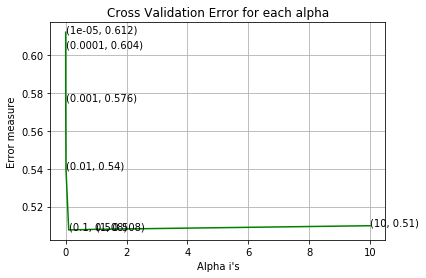

For values of best alpha =  0.1 The train log loss is: 0.3908999246981122
For values of best alpha =  0.1 The test log loss is: 0.5069559717302532
Total number of data points : 121287


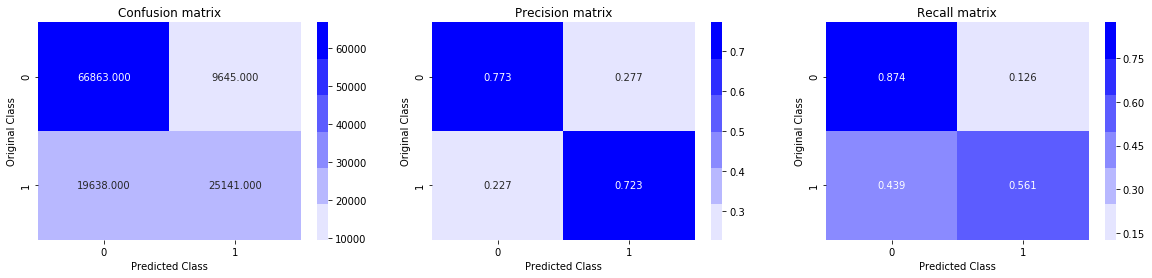

In [28]:
# There is one hyperparameter Alpha,and we are doing grid search for this.
# SGD Claasifier with log loss = Logistic regression
# When we have log loss, we have to calibrate the models. Log loss requires calibrated models, not un calibrated models.
# Error measure in plot is the log loss

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, class_weight = 'balanced', n_jobs = -1)
    clf.fit(train_std, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_std, Y_train)
    predict_y = sig_clf.predict_proba(test_std)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_std, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_std, Y_train)

predict_y = sig_clf.predict_proba(train_std)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_std)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

#### Observation:-

1. At alpha = 0.1, we got the minimum log loss of 0.50. So alpha= 0.1 is best hyperparameter.
2. If the train is very small and test loss is not small, we can conclude that model is overfit
3. The recall for class 0 is 0.874 and recall for class 1 is 0.561 which is above 50% which is ok. 
5. Precision for class 0 and 1 are good and recall for class 0 is good  . 

As Logistc regression is very simple linear classifier model, it has high chance of underfitting , to check whether it is underfitting or not, we can train more complex models. So we are trying other methods/models like Linear SVM 

## 4.2  Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5189881729279724
For values of alpha =  0.0001 The log loss is: 0.5577040360468319
For values of alpha =  0.001 The log loss is: 0.6273733313988613
For values of alpha =  0.01 The log loss is: 0.6585278256322524
For values of alpha =  0.1 The log loss is: 0.658527825632254
For values of alpha =  1 The log loss is: 0.6585278256322632
For values of alpha =  10 The log loss is: 0.6585278256322655


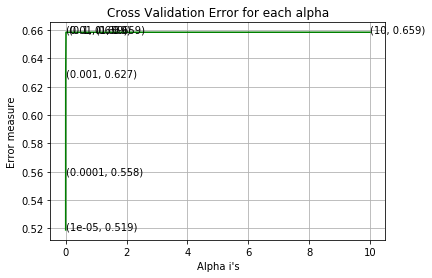

For values of best alpha =  1e-05 The train log loss is: 0.495684798759481
For values of best alpha =  1e-05 The test log loss is: 0.519623220327266
Total number of data points : 121287


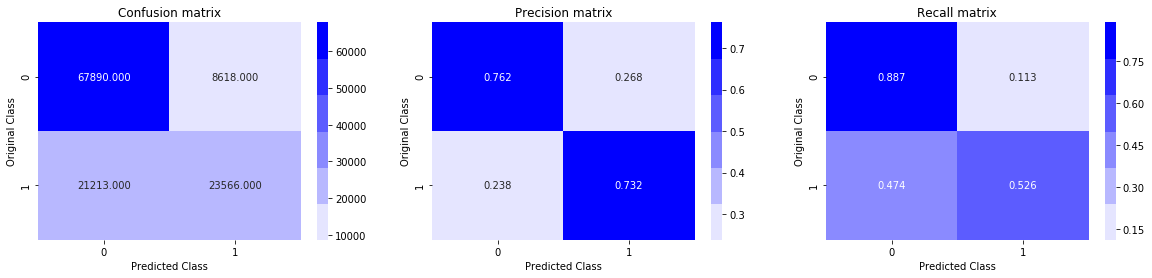

In [34]:
# hyperparameter = alpha, loss is hinge loss , when we have hinge loss with SGD Classifier then it is SVM
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42, class_weight = 'balanced', n_jobs = -1)
    clf.fit(train_std, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_std, Y_train)
    predict_y = sig_clf.predict_proba(test_std)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(train_std, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_std, Y_train)

predict_y = sig_clf.predict_proba(train_std)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_std)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

#### Observation:-

1. The best log loss value is 0.51 for alpha = 1e-05 , which is little higher than the log loss of Logistic Regression
2. The train and test loss in above plot are close to each other ,this means model is not overfitting.

3. The precision and recall for class 0 is very good. Recall for class 1 is also ok which is above 50%. we have to see this.

4. Linear SVM and Logistic Regressin are simple linear models. They have high bias problem which can be solved by performing much complex model like GBDT.
4. Decision trees doesnot work well when we have lots of dimensions.
5. We can perform Gradient Boost or XGBoost which is complex model

## 4.3 XGBoost with Hyperparameter tuning using Random search 

1. Gradient boosted decision trees(GBDT) is a non linear complx method. XGBoost is best library to try GBDT. 


### Finding best hyperparameter with hyperparameter tuning

In [34]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = {'n_estimators': [16, 32, 64, 128, 256, 512], 
                    'max_depth': [3, 5, 7, 9, 12],
                    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                    'subsample': [0.5, 0.6, 0.7, 0.8],
                    'gamma': [0, 0.25, 0.5, 1.0],
                    'min_child_weight': [5,6,7,8,10],
                    'colsample_bytree': [0.5, 0.6, 0.7, 0.8]}

XGB = xgb.XGBClassifier(objective='binary:logistic',eta=0.02, eval_metric = 'logloss', silent=False, verbose=False)
xgb_model = RandomizedSearchCV(XGB, param_distributions = tuned_parameters, n_iter = 30, scoring='neg_log_loss', n_jobs=-1, cv=5, verbose=0, random_state=0)

xgb_model.fit(train_std, Y_train)

print("Model with best parameters is :\n", xgb_model.best_estimator_)

#Best cross validation log loss obtained from hyperparameter tuning
print("Best log loss score on Cross Validation/test data using hyperparameter tuning is: ", xgb_model.best_score_)


Model with best parameters is :
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.7, eta=0.02, eval_metric='logloss', gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=9,
              min_child_weight=7, missing=None, n_estimators=512, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.7, verbose=False)
Best log loss score on Cross Validation/test data using hyperparameter tuning is:  -0.45022150911421643


In [35]:
print("Best parameters :\n", xgb_model.best_params_)

Best parameters :
 {'learning_rate': 0.3, 'colsample_bytree': 0.7, 'n_estimators': 512, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0, 'subsample': 0.7}


The train log loss for TFIDF data is: 0.3810961303524201
The test log loss for TFIDF data is: 0.4442277769564105
Total number of data points : 121287


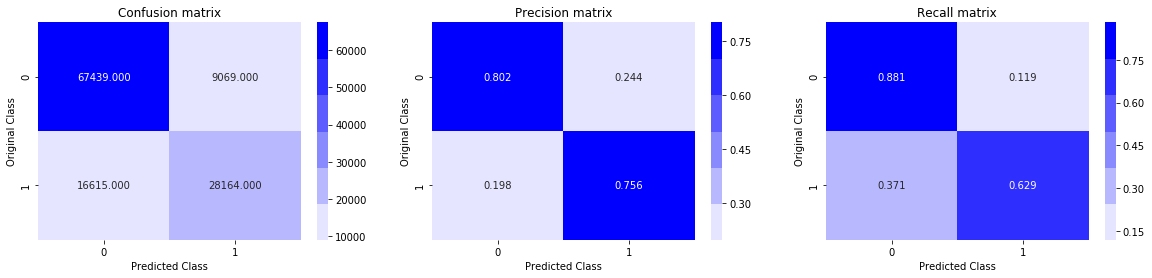

In [36]:
# Model with optimal hyperparameters

xgb_clf = xgb.XGBClassifier(max_depth = 9, objective = 'binary:logistic', n_estimators = 512, min_child_weight = 7,
                            subsample = 0.7, learning_rate = 0.3, colsample_bytree = 0.7, gamma = 0) 

xgb_clf.fit(train_std, Y_train)

predict_y = xgb_clf.predict_proba(train_std)
print("The train log loss for TFIDF data is:",log_loss(Y_train, predict_y, eps=1e-15))

predict_y = xgb_clf.predict_proba(test_std)
print("The test log loss for TFIDF data is:",log_loss(Y_test, predict_y, eps=1e-15))

predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

#### Observation :-

1. The final log loss after hyperparameter tuning is 0.44. 
2. GBDT/XGBoost log loss is reduced and better than Logistc regression and linear SVM log loss which are linear models which have high bias / underfitting problem
3. As Linear models don't overfit so they wont have high variance problem.
4. So by training non linear complex model like XGBoost we can reduce log loss.
5. From above values we can observe train and test log loss are close, so XGBoost is not overfitting, and It also won't underfit much.

##  Models Summarization

In [35]:
from pandas import DataFrame
Quora = {'Model with hyperparameter tuning':['Logistic Regression','Linear SVM','XGBoost'], 
         'Featurization':['TFIDF data','TFIDF data','TFIDF data'],
         'Train log loss':['0.39','0.49','0.38'],
         'Test log loss':['0.50','0.51','0.44']}

In [36]:
Final_conclusions = DataFrame(Quora)
Final_conclusions

,Featurization,Model with hyperparameter tuning,Test log loss,Train log loss
0,TFIDF data,Logistic Regression,0.50,0.39
1,TFIDF data,Linear SVM,0.51,0.49
2,TFIDF data,XGBoost,0.44,0.38


## Conclusions:- 

From the above observations ,

#### XGBoost model has log loss of 0.44.

1. XGBoost with TFIDF featurization has less log loss than the other models like Logistic Regression and Linear SVM. 
2. I did hyperparamter tuning for XGBoost and other 2 models also.
3. As there is no much difference between train and test log loss score in any model, so models are not overfittting.
4. Recall for class 1 in XGBoost model is 0.629 which has increased than the recall value in Logistic Regression and Linear SVM models.
5. Recall for class 0 and Precision for both class 0 and 1, is good for all the 3 models. 
6. So XGBoost model has given good results and less log loss in this case study.